<a href="https://colab.research.google.com/github/Felipe-Pinto/python_para_investimentos/blob/master/SeriesTemporaisComMonteCarlo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <font color='blue'>Séries Temporais</font>
<p> Séries Temporais nada mais é do que uma série de ponto de dados ordenados no decorrer do tempo. Em uma série temporal, o tempo costuma ser a variável independente e a meta geralmente é fazer uma previsão para o futuro.<br>

### Exemplos de campos de uso
<p>
Economia: Produto Interno Bruto (PIB), Índice de Preços ao Consumidor (IPC), Índice S&P 500 e taxas de desemprego<br>
Ciências Sociais: Taxas de natalidade, população, dados de migração, indicadores políticos<br>
Epidemiologia: Taxas de doenças, taxas de mortalidade, populações de mosquitos<br>
Medicina:Controle de pressão arterial, controle de peso, medições de colesterol, monitoramento de frequência cardíaca<br>
Física:	Temperaturas globais, observações mensais de manchas solares, níveis de poluição.    
    
# <font color='blue'>Monte Carlo</font>
<p> As simulações de Monte Carlo têm o nome do hot spot de apostas em Mônaco, pois o
acaso e os resultados aleatórios são centrais na técnica de modelagem, assim como em jogos
como roleta, dados e caça-níqueis. A técnica foi desenvolvida pela primeira vez por Stanislaw
Ulam, um matemático que trabalhou no Projeto Manhattan. Após a guerra, enquanto se
recuperava de uma cirurgia no cérebro, Ulam se divertiu jogando inúmeros jogos de paciência.
Ele ficou interessado em traçar o resultado de cada um desses jogos, a fim de observar sua
distribuição e determinar a probabilidade de vitória. Depois que ele compartilhou sua ideia com
John Von Neumann, os dois colaboraram para desenvolver a simulação de Monte Carlo
    
### Exemplos de campos de uso
As telecomunicações as utilizam para avaliar o desempenho da rede em
diferentes cenários, ajudando-os a otimizar a rede.<br>
Os analistas os utilizam para avaliar o risco de uma entidade adiar e analisar derivativos, ou outros produtos financeiros.<br> Seguradoras e perfuradores de poços de petróleo também os utilizam.<br>
As simulações de Monte Carlo têm inúmeras aplicações fora dos negócios e das finanças, como meteorologia, astronomia e física
de partículas    

### Estudo de Caso - Simulação de Monte Carlo e Séries Temporais Para Modelagem Financeira

### Carregando os Pacotes

In [1]:
#importando a biblioteca do YahooFinance para baixar cotações
#Caso não tenha instalado ainda esse pacote, basta digitar !pip3 install yfinance
import yfinance as yF

# Imports para manipulação de dados
import numpy as np
import pandas as pd

# Imports para visualização
import matplotlib.pyplot as plt
import matplotlib as m
import seaborn as sns

# Imports para cálculos estatísticos
import scipy
#from scipy.stats import kurtosis, skew, shapiro
import warnings
warnings.filterwarnings("ignore")

# Imports para formatação dos gráficos
plt.style.use('fivethirtyeight')
m.rcParams['axes.labelsize'] = 14
m.rcParams['xtick.labelsize'] = 12
m.rcParams['ytick.labelsize'] = 12
m.rcParams['text.color'] = 'k'
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 20,10


#formatando valores com duas casas decimais
pd.options.display.float_format = '{:.2f}'.format

### Carregando os Dados

In [2]:
# Carrega o dataset
#dados = pd.read_csv("dados.csv", parse_dates = True, index_col = "Data")

Cotacoes = yF.Ticker("BTC-USD")

# Opções de períodos 1d, 5d, 1mo, 3mo, 6mo, 1y, 2y, 5y, 10y e ytd.
dados = Cotacoes.history(period="1y")
dados.head()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2023-11-08 00:00:00+00:00,35419.48,35994.42,35147.80,35655.28,17295394918,0.00,0.00
2023-11-09 00:00:00+00:00,35633.63,37926.26,35592.10,36693.12,37762672382,0.00,0.00
2023-11-10 00:00:00+00:00,36702.25,37493.80,36362.75,37313.97,22711265155,0.00,0.00
2023-11-11 00:00:00+00:00,37310.07,37407.09,36773.67,37138.05,13924272142,0.00,0.00
2023-11-12 00:00:00+00:00,37133.99,37227.69,36779.12,37054.52,11545715999,0.00,0.00


In [3]:
dados.drop('Dividends', axis=1, inplace=True)
dados.drop('Stock Splits', axis=1, inplace=True)
dados.columns = ['Abertura','Maximo','Minimo','Fechamento','Volume']
dados.head()

,Abertura,Maximo,Minimo,Fechamento,Volume
Date,,,,,
2023-11-08 00:00:00+00:00,35419.48,35994.42,35147.80,35655.28,17295394918
2023-11-09 00:00:00+00:00,35633.63,37926.26,35592.10,36693.12,37762672382
2023-11-10 00:00:00+00:00,36702.25,37493.80,36362.75,37313.97,22711265155
2023-11-11 00:00:00+00:00,37310.07,37407.09,36773.67,37138.05,13924272142
2023-11-12 00:00:00+00:00,37133.99,37227.69,36779.12,37054.52,11545715999


In [4]:
# Vamos observar o nosso range de dados
print('Menor data: ', dados.index.min())
print('Maior data:', dados.index.max())

Menor data:  2023-11-08 00:00:00+00:00
Maior data: 2024-11-08 00:00:00+00:00


In [5]:
# Vamos observar os dados referente a ultima data do nosso conjunto de dados
# Utilizaremos esses dados mais adiante para compor os parametros a simulação de Monte Carlo
display(dados.loc[dados.index.max()])

,2024-11-08 00:00:00+00:00
Abertura,75900.03
Maximo,77208.52
Minimo,75690.79
Fechamento,76430.95
Volume,55962361856.00


In [7]:
# Calculando o percentual de mudança na cotação de fechamento diário das ações
# Ou seja, quanto o valor de fechamento varia de um dia para outro, o retorno diário da ação
retorno_diario = dados["Fechamento"].pct_change().dropna()
retorno_diario.head

<bound method NDFrame.head of Date
2023-11-09 00:00:00+00:00    0.03
2023-11-10 00:00:00+00:00    0.02
2023-11-11 00:00:00+00:00   -0.00
2023-11-12 00:00:00+00:00   -0.00
2023-11-13 00:00:00+00:00   -0.01
                             ... 
2024-11-04 00:00:00+00:00   -0.01
2024-11-05 00:00:00+00:00    0.02
2024-11-06 00:00:00+00:00    0.09
2024-11-07 00:00:00+00:00    0.00
2024-11-08 00:00:00+00:00    0.01
Name: Fechamento, Length: 366, dtype: float64>

In [8]:
dados = pd.merge(dados, retorno_diario, how = 'inner', on = 'Date')
dados.columns = ['Abertura','Maximo','Minimo','Fechamento','Volume','Variacao_Diaria']
dados.head()

,Abertura,Maximo,Minimo,Fechamento,Volume,Variacao_Diaria
Date,,,,,,
2023-11-09 00:00:00+00:00,35633.63,37926.26,35592.10,36693.12,37762672382,0.03
2023-11-10 00:00:00+00:00,36702.25,37493.80,36362.75,37313.97,22711265155,0.02
2023-11-11 00:00:00+00:00,37310.07,37407.09,36773.67,37138.05,13924272142,-0.00
2023-11-12 00:00:00+00:00,37133.99,37227.69,36779.12,37054.52,11545715999,-0.00
2023-11-13 00:00:00+00:00,37070.30,37405.12,36399.61,36502.36,19057712790,-0.01


In [9]:
# Tipos de Dados
dados.dtypes

,0
Abertura,float64
Maximo,float64
Minimo,float64
Fechamento,float64
Volume,int64
Variacao_Diaria,float64


In [10]:
# Shape
dados.shape

(366, 6)

In [11]:
# Sumário estatístico
dados.describe()

,Abertura,Maximo,Minimo,Fechamento,Volume,Variacao_Diaria
count,366.00,366.00,366.00,366.00,366.00,366.00
mean,57835.44,58994.10,56703.39,57947.12,30543739412.85,0.00
std,10783.76,10990.49,10520.69,10764.38,14432904229.05,0.03
min,35548.11,36704.48,34948.50,35537.64,9099571165.00,-0.08
25%,46738.97,48147.75,45365.28,47014.68,20598739773.00,-0.01
50%,61433.01,62972.83,60294.27,61500.59,28082877233.50,0.00
75%,66594.29,67680.21,65140.08,66601.86,37225108588.00,0.02
max,75900.03,77208.52,75690.79,76430.95,118592653963.00,0.12


## Visualizando o Preço Diário de Fechamento das Ações no Tempo

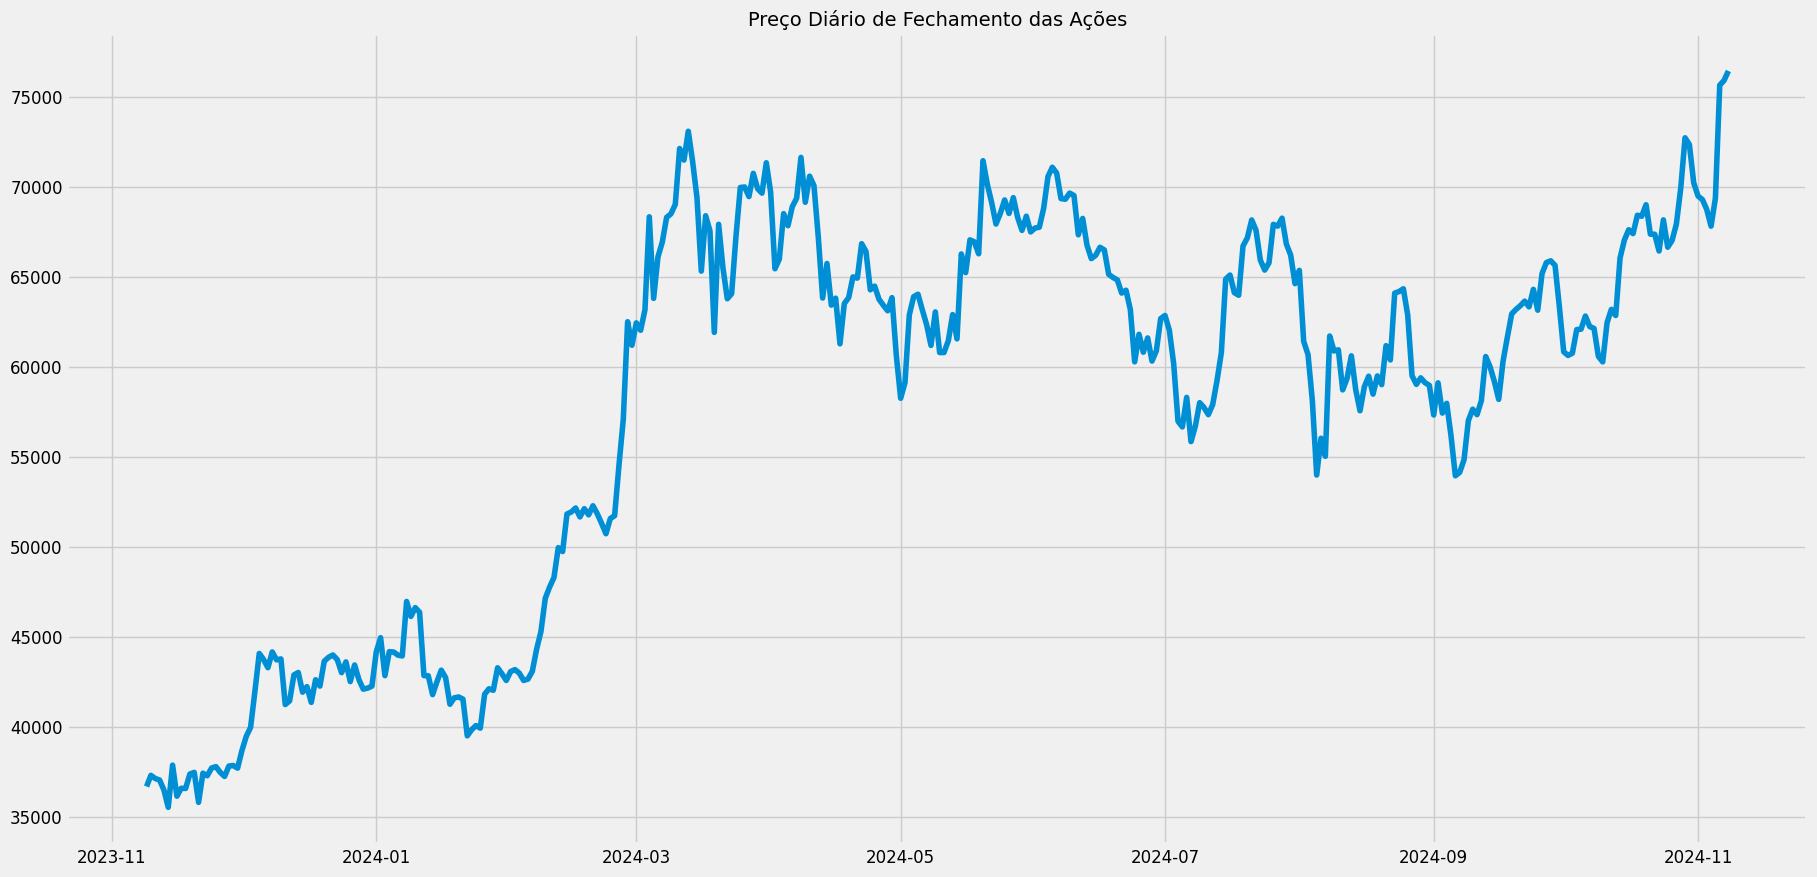

In [12]:
# Plot
plt.plot(dados["Fechamento"])
plt.title("Preço Diário de Fechamento das Ações", size = 14)
plt.show()

In [13]:
# Retorno acumulado
retorno_diario_acumulado = (1 + retorno_diario).cumprod() - 1
retorno_diario_acumulado.max()

1.1436082119242705

### Análise Exploratória e Estatística Descritiva

Vamos usar a estatística para calcular o retorno médio e a variação (desvio padrão).

In [14]:
# Média do fechamento diário da cotação das ações
media_retorno_diario = np.mean(retorno_diario)

In [15]:
# Desvio padrão do fechamento diário da cotação das ações
desvio_retorno_diario = np.std(retorno_diario)

In [16]:
# Média e desvio padrão
print("Média do Retorno de Fechamento:", media_retorno_diario)
print("Desvio Padrão do Retorno de Fechamento:", desvio_retorno_diario)

Média do Retorno de Fechamento: 0.0024590952800411735
Desvio Padrão do Retorno de Fechamento: 0.027453853732509078


Vamos considerar o ano com 364 dias de funcionamento por ser um criptoativo. Caso seja uma ação normal, devemos considerar somente 252 dias do ano, pois a operação de ações ocorre somente de segunda a sexta

In [17]:
# Média e desvio padrão no ano (considerando 364 dias de operações)
print("Retorno Médio Anualizado de Fechamento:", (1 + media_retorno_diario) ** 364 - 1)
print("Desvio Padrão Anualizado de Fechamento:", desvio_retorno_diario*np.sqrt(364))

Retorno Médio Anualizado de Fechamento: 1.444918775392623
Desvio Padrão Anualizado de Fechamento: 0.5237861461081468


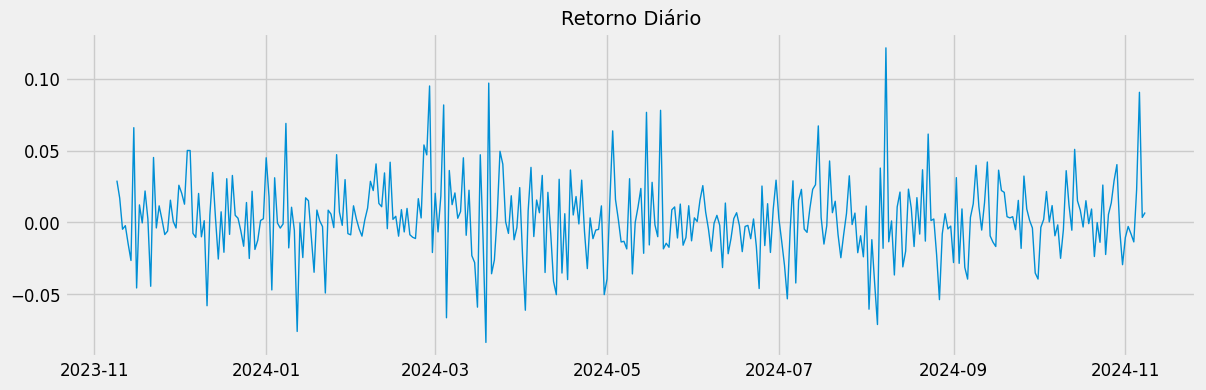

In [26]:
# Plot
plt.figure(figsize=(13,4))
plt.plot(retorno_diario, linewidth=1)
plt.title("Retorno Diário", size = 14)
plt.show()

Com apenas quatro grandes variações, o retorno diário tem sido constante ao longo do tempo. Vamos criar um histograma com a dstribuição do retorno diário.

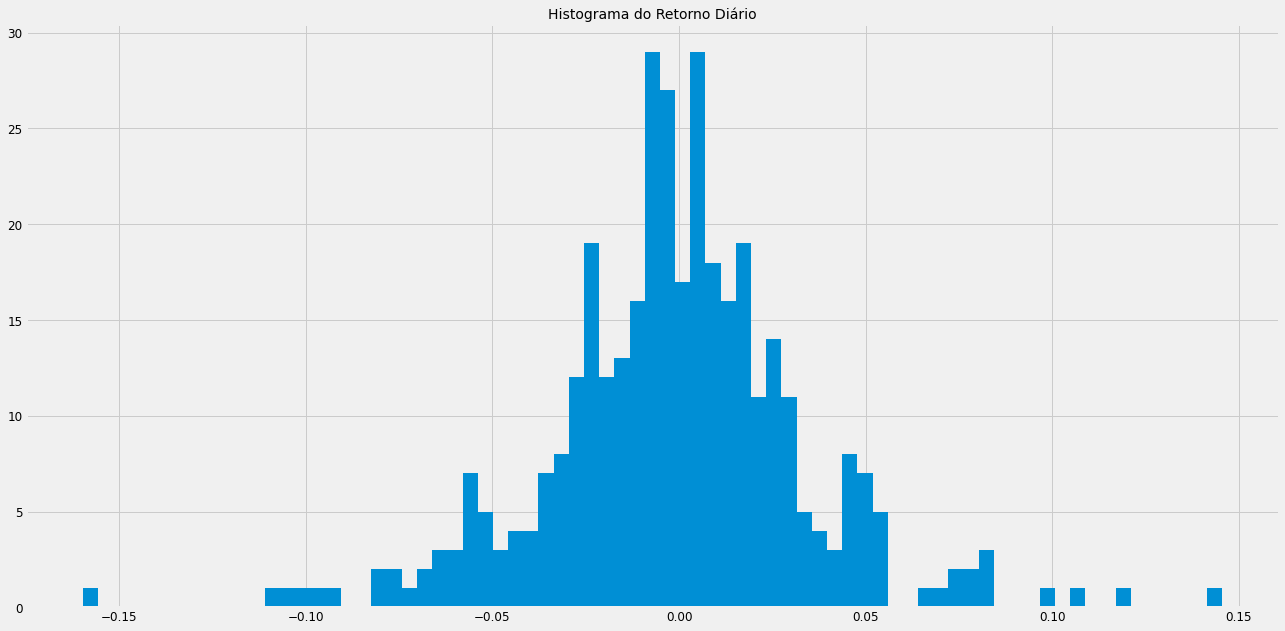

In [ ]:
# Plot
plt.hist(retorno_diario, bins = 75)
plt.title("Histograma do Retorno Diário", size = 14)
plt.show()

Os valores estão bem próximos mesmo da média.

In [ ]:
# Transformação de log e diferenciação para cálculo do retorno diário
log_retorno_diario = (np.log(dados["Fechamento"]) - np.log(dados["Fechamento"]).shift(-1)).dropna()

# Calculamos média e desvio padrão após a transformação
log_media_retorno_diario = np.mean(log_retorno_diario)
log_desvio_retorno_diario = np.std(log_retorno_diario)

Vamos criar um plot com o retorno diário da série transformada.

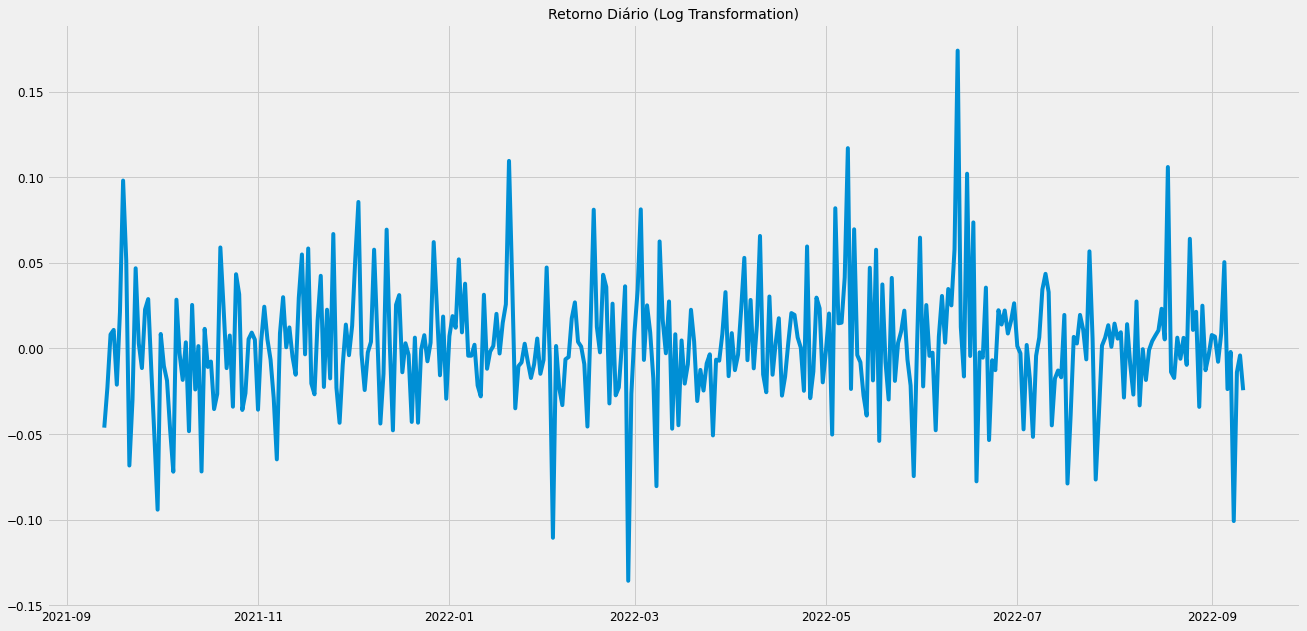

In [ ]:
# Plot
plt.plot(log_retorno_diario)
plt.title("Retorno Diário (Log Transformation)", size = 14)
plt.show()

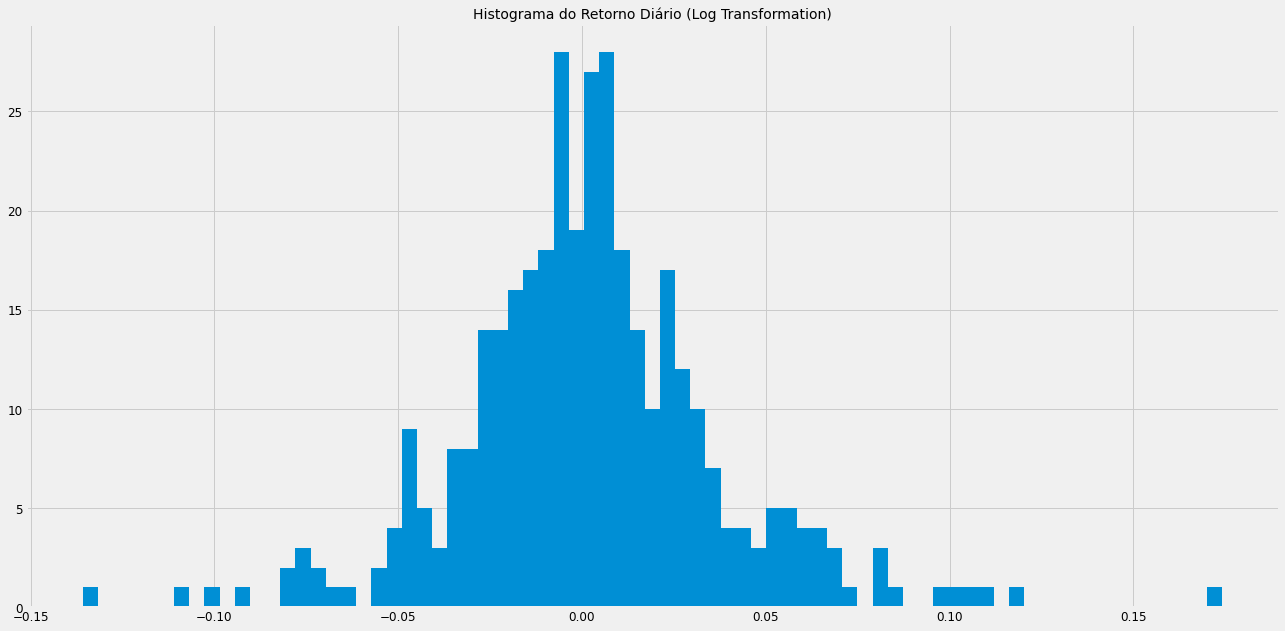

In [ ]:
# Plot
plt.hist(log_retorno_diario, bins = 75)
plt.title("Histograma do Retorno Diário (Log Transformation)", size = 14)
plt.show()

### Valor Histórico

Vamos calcular o valor histórico do preço da ação.

In [ ]:
# Nível de variância
var_level = 95
var = np.percentile(log_retorno_diario, 100 - var_level)
print("Certeza de que as perdas diárias não excederão o VaR% em um determinado dia com base em valores históricos.")
print("VAR 95%:", var)

Certeza de que as perdas diárias não excederão o VaR% em um determinado dia com base em valores históricos.
VAR 95%: -0.05001812030917865


In [ ]:
# Var para os próximos 5 dias
var * np.sqrt(5)

-0.11184391711808626

### Valor Histórico Condicional

In [ ]:
# Nível de variância
var_level = 95
var = np.percentile(log_retorno_diario, 100 - var_level)
cvar = log_retorno_diario[log_retorno_diario < var].mean()
print("Nos piores 5% dos casos, as perdas foram, em média, superiores ao percentual histórico.")
print("CVaR 95%:", cvar)

Nos piores 5% dos casos, as perdas foram, em média, superiores ao percentual histórico.
CVaR 95%: -0.07469947313405871


### Monte Carlo simulation

In [ ]:
# Simulação de Monte Carlo

# Número de dias a frente
dias_posteriores = 180

# Número de simulações
simulacoes = 2500

# Último valor da ação
ultimo_preco = 22307.00

# Cria um array vazio com as dimensões
results = np.empty((simulacoes, dias_posteriores))

# Loop por cada simulação
for s in range(simulacoes):

    # Calcula o retorno com dados randômicos seguindo uma distribuição normal
    random_returns = 1 + np.random.normal(loc = log_media_retorno_diario,
                                          scale = log_desvio_retorno_diario,
                                          size = dias_posteriores)

    result = ultimo_preco * (random_returns.cumprod())

    results[s, :] = result

In [ ]:
# Definindo o índice da série simulada
index = pd.date_range("2022-09-13", periods = dias_posteriores, freq = "D")
resultados = pd.DataFrame(results.T, index = index)
media_resultados = resultados.apply("mean", axis = 1)

## Resultado da Simulação de Monte Carlo

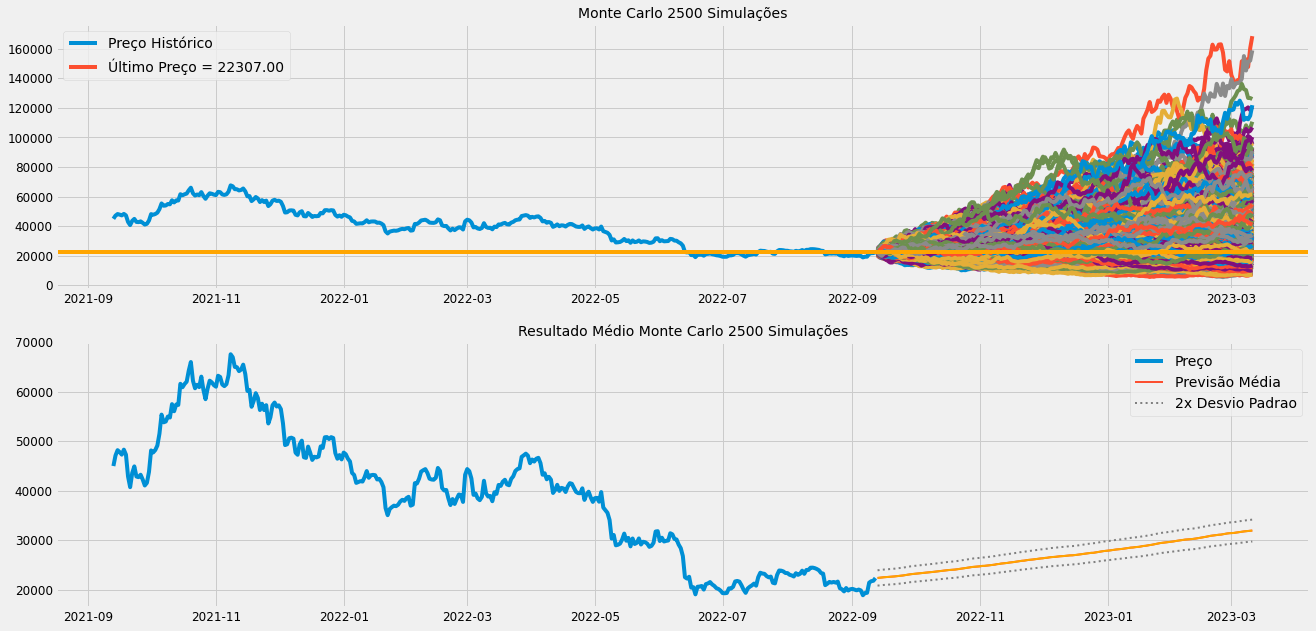

In [ ]:
# Dividindo a área de plotagem em 2 subplots
fig, ax = plt.subplots(nrows = 2, ncols = 1)

# Plot
ax[0].plot(dados["Fechamento"][:"2023-03-31"])

ax[0].plot(resultados)

ax[0].axhline(22307.00, c = "orange")

ax[0].set_title(f"Monte Carlo {simulacoes} Simulações", size = 14)

ax[0].legend(["Preço Histórico", "Último Preço = 22307.00"])

ax[1].plot(dados["Fechamento"][:"2023-03-31"])

ax[1].plot(resultados.apply("mean", axis = 1), lw = 2)

ax[1].plot(media_resultados.apply((lambda x: x * (1+1.96 * log_desvio_retorno_diario))),
           lw = 2, linestyle = "dotted", c = "gray")

ax[1].plot(media_resultados, lw = 2, c = "orange")

ax[1].plot(media_resultados.apply((lambda x: x * (1-1.96 * log_desvio_retorno_diario))),
           lw = 2, linestyle = "dotted", c = "gray")

ax[1].set_title(f"Resultado Médio Monte Carlo {simulacoes} Simulações", size = 14)

ax[1].legend(["Preço", "Previsão Média", "2x Desvio Padrao"])

plt.show()

In [ ]:
# Exemplo para demonstração da importancia do INDICE
df = pd.read_csv('taxis_bikes.csv')
df.head(10)

,Data,Distancia,Tempo
0,8/2/15,1.70,NaN
1,8/3/15,1.40,NaN
2,8/4/15,2.10,NaN
3,8/6/15,2.38,NaN
4,8/7/15,2.30,NaN
5,8/8/15,3.40,NaN
6,8/9/15,2.50,NaN
7,8/10/15,3.36,0:28:37
8,8/11/15,1.67,0:13:07
9,8/12/15,1.42,0:10:35


In [ ]:
# Por padrão o PANDAS cria um índice para cada registro do DataFrame, numerado de 0 até o ultimo registro.
# Neste caso vai de 0 até 81
df.index

RangeIndex(start=0, stop=81, step=1)

<AxesSubplot:>

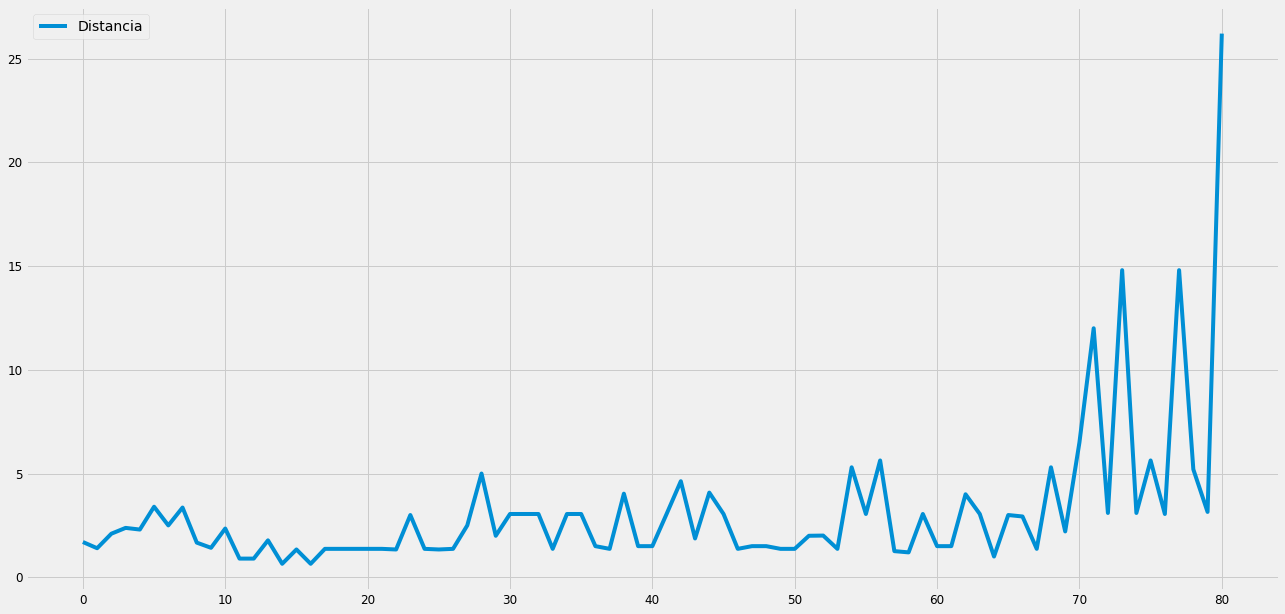

In [ ]:
# A variavel DATA precisa ser o indice do DataFrame, caso contrario não irá funcionar.
df.plot()

In [ ]:
# Definindo a variável DATA como índice
df.set_index('Data', inplace = True)
df.head(10)

,Distancia,Tempo
Data,,
8/2/15,1.70,NaN
8/3/15,1.40,NaN
8/4/15,2.10,NaN
8/6/15,2.38,NaN
8/7/15,2.30,NaN
8/8/15,3.40,NaN
8/9/15,2.50,NaN
8/10/15,3.36,0:28:37
8/11/15,1.67,0:13:07


In [ ]:
df.index

Index(['8/2/15', '8/3/15', '8/4/15', '8/6/15', '8/7/15', '8/8/15', '8/9/15',
       '8/10/15', '8/11/15', '8/12/15', '8/13/15', '8/14/15', '8/14/15',
       '8/15/15', '8/16/15', '8/17/15', '8/18/15', '8/19/15', '8/19/15',
       '8/20/15', '8/21/15', '8/22/15', '8/23/15', '8/24/15', '8/25/15',
       '8/25/15', '8/26/15', '8/27/15', '8/29/15', '9/2/15', '9/4/15',
       '9/5/15', '9/8/15', '9/10/15', '9/12/15', '9/16/15', '9/17/15',
       '9/19/15', '9/21/15', '9/28/15', '9/28/15', '9/29/15', '10/4/15',
       '10/4/15', '10/4/15', '10/12/15', '10/14/15', '10/18/15', '10/18/15',
       '10/18/15', '10/20/15', '10/25/15', '10/31/15', '11/2/15', '11/3/15',
       '11/4/15', '11/7/15', '11/7/15', '11/7/15', '11/9/15', '11/10/15',
       '11/10/15', '11/10/15', '11/23/15', '11/27/15', '11/28/15', '12/9/15',
       '12/12/15', '12/13/15', '12/13/15', '12/15/15', '12/17/15', '12/19/15',
       '12/20/15', '12/22/15', '12/23/15', '12/24/15', '12/25/15', '12/26/15',
       '12/30/15', '1/1/1

<AxesSubplot:xlabel='Data'>

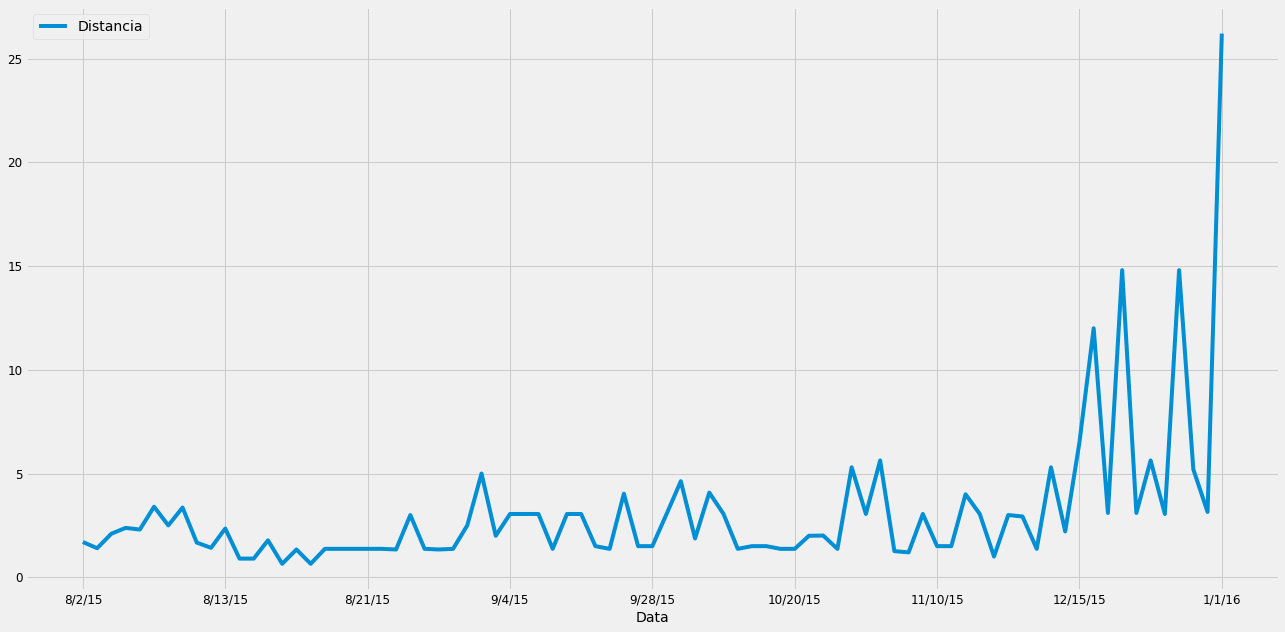

In [ ]:
df.plot()